# Import lib


In [1]:
import pandas as pd
import numpy as np
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# useful for getting number of output classes
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

# Dataset

In [7]:
train_path = './new_dataset/train'
test_path = './new_dataset/test'

In [8]:
classes = glob('./new_dataset/train/*')

In [9]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 15,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2929 images belonging to 5 classes.


In [11]:
test_set = test_datagen.flow_from_directory(test_path,
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 733 images belonging to 5 classes.


# Densenet169

In [12]:
Densenet_model = Sequential()

pretrained_model = tf.keras.applications.DenseNet169(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling=None
)

for layers in pretrained_model.layers:
    layers.trainable = False

Densenet_model.add(pretrained_model)
Densenet_model.add(Flatten())
Densenet_model.add(Dense(256, activation='relu'))
Densenet_model.add(Dense(5, activation='softmax'))

In [13]:
Densenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 module_wrapper (ModuleWrapp  (None, 81536)            0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 256)              20873472  
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                1285      
 pper)                                                           
                                                                 
Total params: 33,517,637
Trainable params: 20,874,757
Non-trainable params: 12,642,880
___________________________________

In [14]:
Densenet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
epochs=50
history = Densenet_model.fit(
  training_set,
  validation_data=test_set,
  epochs=epochs
)

Epoch 1/50
92/92 [==============================] - 49s 442ms/step - loss: 8.1221 - accuracy: 0.6521 - val_loss: 1.1891 - val_accuracy: 0.7640
Epoch 2/50
92/92 [==============================] - 35s 382ms/step - loss: 1.5936 - accuracy: 0.7132 - val_loss: 1.7127 - val_accuracy: 0.6971
Epoch 3/50
92/92 [==============================] - 35s 381ms/step - loss: 1.3401 - accuracy: 0.7231 - val_loss: 0.7123 - val_accuracy: 0.7763
Epoch 4/50
92/92 [==============================] - 35s 384ms/step - loss: 0.7563 - accuracy: 0.7617 - val_loss: 0.5923 - val_accuracy: 0.7722
Epoch 5/50
92/92 [==============================] - 35s 385ms/step - loss: 0.5679 - accuracy: 0.7938 - val_loss: 0.5699 - val_accuracy: 0.7885
Epoch 6/50
92/92 [==============================] - 36s 388ms/step - loss: 0.5726 - accuracy: 0.7808 - val_loss: 0.5707 - val_accuracy: 0.7763
Epoch 7/50
92/92 [==============================] - 35s 381ms/step - loss: 0.5626 - accuracy: 0.7938 - val_loss: 0.5430 - val_accuracy: 0.7899

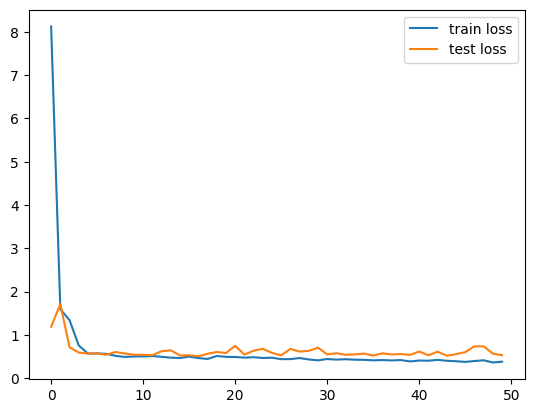

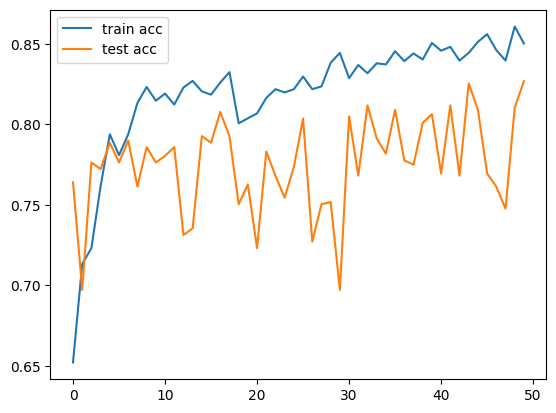

In [16]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()